In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Show plots inline
%matplotlib inline

In [2]:
# Load cleaned log files
df_ldap = pd.read_csv("../data_processed/ldap_cleaned.csv")
df_logon = pd.read_csv("../data_processed/logon_cleaned.csv")
df_device = pd.read_csv("../data_processed/device_cleaned.csv")
df_http = pd.read_csv("../data_processed/http_cleaned.csv")

In [3]:
# Add a 'date' only column if needed
df_logon['date'] = pd.to_datetime(df_logon['date'])
df_logon['date_only'] = df_logon['date'].dt.date

# Count logons by user
logon_counts = df_logon.groupby('user').size().reset_index(name='logon_count')

# Sort descending
logon_counts = logon_counts.sort_values(by='logon_count', ascending=False)

# Peek
logon_counts.head(10)

,user,logon_count
203,DTAA/CGM0994,5110
444,DTAA/IRC0991,5015
294,DTAA/DSM0990,4986
459,DTAA/JCC0998,4980
520,DTAA/KEE0997,4942
217,DTAA/CLN0999,4908
138,DTAA/BJM0992,4906
326,DTAA/ELD1000,4900
504,DTAA/JTT0989,4864
215,DTAA/CLB0995,4836


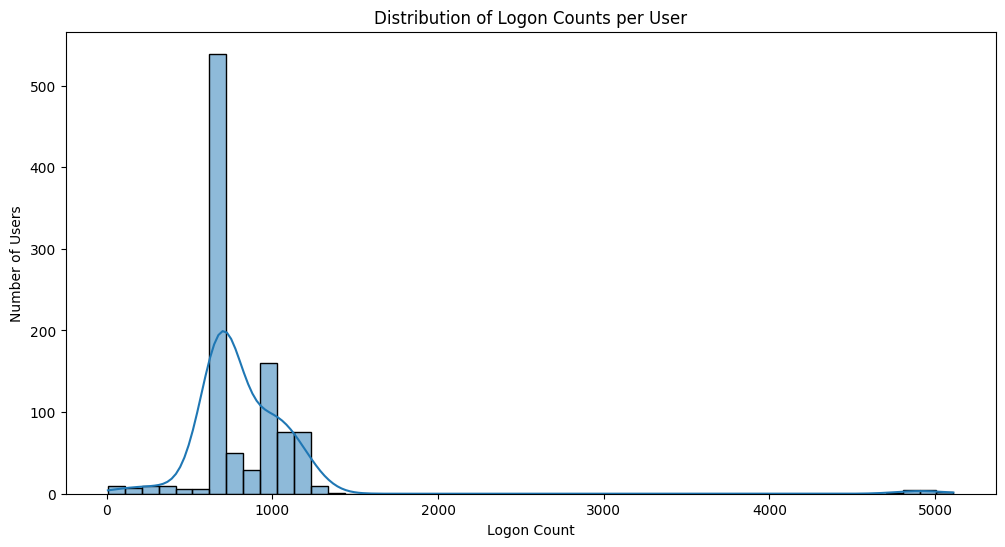

In [4]:
plt.figure(figsize=(12,6))
sns.histplot(logon_counts['logon_count'], bins=50, kde=True)
plt.title("Distribution of Logon Counts per User")
plt.xlabel("Logon Count")
plt.ylabel("Number of Users")
plt.show()

In [5]:
# Save top suspicious logon users
logon_counts.to_csv("../output/logon_counts_per_user.csv", index=False)
print("Logon counts saved to /output/")

Logon counts saved to /output/


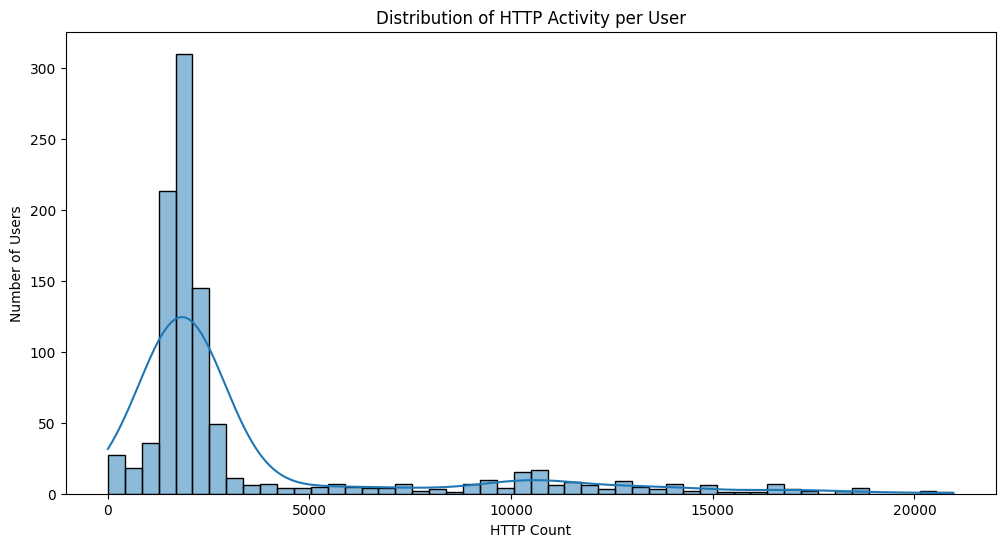

HTTP counts saved to /output/


In [6]:
# Parse date column if needed
df_http['date'] = pd.to_datetime(df_http['date'])
df_http['date_only'] = df_http['date'].dt.date

# HTTP counts per user
http_counts = df_http.groupby('user').size().reset_index(name='http_count')
http_counts = http_counts.sort_values(by='http_count', ascending=False)

http_counts.head(10)

# Plot
plt.figure(figsize=(12,6))
sns.histplot(http_counts['http_count'], bins=50, kde=True)
plt.title("Distribution of HTTP Activity per User")
plt.xlabel("HTTP Count")
plt.ylabel("Number of Users")
plt.show()

# Save slice
http_counts.to_csv("../output/http_counts_per_user.csv", index=False)
print("HTTP counts saved to /output/")

In [7]:
# Merge logon and HTTP counts on user
combined = pd.merge(logon_counts, http_counts, on='user', how='outer').fillna(0)

# Calculate simple score: logon_count + http_count
combined['activity_score'] = combined['logon_count'] + combined['http_count']

# Sort
combined = combined.sort_values(by='activity_score', ascending=False)

combined.head(10)

# Save final callout
combined.to_csv("../output/top_users_activity_score.csv", index=False)
print("Top users callout saved to /output/")

Top users callout saved to /output/


### EDA Dashboard Wireframe Summary

- Generated suspicious logins per user.
- Identified HTTP and device activity outliers.
- Combined into final activity score.
- Saved slices to `/output/` for Excel.
- Next step: Build final dashboard visuals in `/excel_dashboard/`.